In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("practice.ipynb")

In [ ]:
import practice_test

# Lab 5: Looping Patterns and Hurricane API

**WARNING:** Please go through Segment 1 of [Lab 5](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-lecture-material/-/tree/main/sum23/labs/lab5) **before** you start to solve this notebook.

## Segment 2: Learning the API

### Task 2.1: Examine the `hurricanes` CSV file

The `project.py` file will allow you to access the dataset you'll use this week, `hurricanes.csv`. We generated this data file by writing a Python program to extract data from several lists of hurricanes over the Atlantic Ocean on Wikipedia (here is an [example](https://en.wikipedia.org/wiki/2022_Atlantic_hurricane_season)). You can take a look at the script `gen_csv.ipynb` yourself. At the end of the semester, you will be able to write it yourself.

Open `hurricanes.csv` with Microsoft Excel or some other Spreadsheet viewer and look at the hurricanes in the dataset. The data shows:

* `name` (the name of the hurricane),
* `formed` (the date of formation of the hurricane),
* `dissipated` (the date of dissipation of the hurricane),
* `mph` (the max wind speed in mph of the hurricane),
* `damage` (the damage in US dollars caused by the hurricane),
* `deaths` (the number of deaths caused by the hurricane).

Often, we'll organize data by assigning numbers (called **indexes**) to different parts of the data (e.g., rows or columns in a table). In Computer Science, indexing typically starts with the number `0`; i.e., when you have a sequence of things, you'll start counting them from `0` instead of `1`. Thus, you should **ignore the numbers shown by your Spreadsheet Viewer to the left of the rows**. From the perspective of `project.py`, the indexes of `1804 New England hurricane`, `1806 Great Coastal hurricane`, and `1812 Louisiana hurricane` are `0`, `1`, and `2` respectively (and so on).

For example, consider this example from `hurricanes.csv` as viewed from Microsoft Excel:

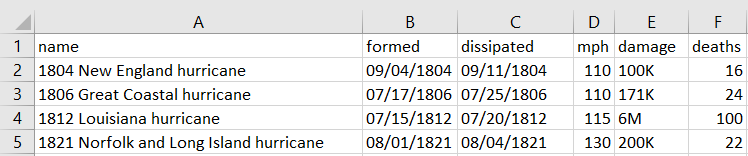

The **index** for the `1812 Louisiana hurricane` is `2` but it is the third entry in the dataset, and it is on **row** `4` of the table. Therefore, you must follow this convention for all the questions
asking for the value at a particular **index**.

### Task 2.2: Explore the API
Use the inspection process we learned in [Lab 3](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-lecture-material/-/tree/main/sum23/labs/lab3) and [Lab 4](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-lecture-material/-/tree/main/sum23/labs/lab4) to know more details of the 'project' API. In Lab 3, we saw how to use `dir`, and `help` to learn the API. Run the following cells to explore the API:

In [ ]:
# it is considered a good coding practice to place all import statements at the top of the notebook
# please place all your import statements in this cell if you need to import any more modules for this project


In [ ]:
# use the 'dir' function to learn more about the project API


Spend some time reading about each of the seven functions that don't begin with two underscores. For example, run this to learn about `count`:

In [ ]:
help(project.count) 

Alternatively, you could run the following to just see the function's documentation:

In [ ]:
print(project.count.__doc__)

You may also open up the `project.py` file directly to learn about the functions provided. E.g., you might see this:

```python
def count():
    """This function will return the number of records in the dataset"""
    return len(__hurricane__)
```

You don't need to understand the code in the functions, but the strings in triple quotes (called *docstrings*) explain what each function does. As it turns out, all `project.count.__doc__` is providing you is the docstring of the `count` function.

Try to learn other functions in `project.py`, by using `help` function. For example, you may try: 

In [ ]:
help(project.get_name)

In [ ]:
# now try getting help for the other functions in the `project` module


### Task 2.2.1: Getting familiar with `project.py`

You will now demonstrate your familiarity with the functions inside the `project` module by answering a few simple questions. You must have already imported the `project` module to this notebook. Make sure you placed the `import` statememnt at the **top** of the notebook in the designated cell.

**Remember:** In Computer Science, we start indexing at `0`.

**Question 1.1:** What is the `name` of the hurricane at **index** `0`? 

In [ ]:
# we have done this for you!
name_idx0 = project.get_name(0)

name_idx0

In [ ]:
grader.check("q1-1")

**Question 1.2:** What is the `name` of the hurricane at **index** `1`? 

In [ ]:
# replace the ... below with your code
name_idx1 = ...
name_idx1

In [ ]:
grader.check("q1-2")

**Question 1.3:** What is the speed in `mph` of the hurricane at **index** `7`? 

In [ ]:
# replace the ... below with your code
mph_idx7 = ...
mph_idx7

In [ ]:
grader.check("q1-3")

**Question 1.4:** What is the `damage` in dollars caused of the hurricane at **index** `5`? 

In [ ]:
# replace the ... below with your code
damage_idx5 = ...
damage_idx5

In [ ]:
grader.check("q1-4")

Notice that the damage amount ends with a "M". In this dataset, "K" represents one thousand, "M" represents one million, and "B" represents one billion. In P5, you'll need to convert these strings to integers (e.g., `"1.5K"` will become `1500`, `"2.55M"` will become `2550000`).

**Question 2:** What is the `name` of the **last** hurricane in the dataset?

In [ ]:
# we have done this for you!
name_idx_last = project.get_name(project.count() - 1)
name_idx_last

In [ ]:
grader.check("q2")

Now, let us try to get the `name` at index `project.count()` instead. What happens? Why? Feel free to reach out to your TA/PM, if you are not sure.

In [ ]:
# execute this cell without changing anything
project.get_name(project.count())

## Segment 3: Working with strings

### Task 3.1: Indexing / slicing Strings

Stepping back from the Hurricane data, Tasks 3.1 and 3.2 introduce us to performing operations with strings. While this will be covered in more detail during Friday's lecture, we will cover the essentials now.

We can think of a string as a sequence of characters. For example, the string `my_str = 'hello_world!'` can be written as...

| index  | 0    | 1    | 2    | 3    | 4    | 5    | 6    | 7    | 8    | 9    | 10   | 11   |
| ------ | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| string | h    | e    | l    | l    | o    | _    | w    | o    | r    | l    | d    | !    |

... where we can then access specific characters of the string by an index, e.g. `my_str[0]` which returns `'h'` or `my_str[8]` which returns `'r'`.

Furthermore, we can "slice" strings -- that is, get a particular section of characters. For example,

- `my_str[1:5]` returns `'ello'`
- `my_str[:8]` returns `'hello_wo'`
- `my_str[5:]` returns `'_world!'`
- `my_str[:]` returns `'hello_world!'`

Try running this in the cell below.

In [ ]:
my_str = 'hello_world!'
print("my_str[0] returns", my_str[0])
print("my_str[8] returns", my_str[8])
print("my_str[1:5] returns", my_str[1:5])
print("my_str[:8] returns", my_str[:8])
print("my_str[5:] returns", my_str[5:])
print("my_str[:] returns", my_str[:])

Notice that slicing is *inclusive* on the lower bound and *exclusive* on the upper bound. We can also leave out a bound to start from the beginning (e.g. `my_str[:6]`) or to keep going until the end (e.g. `my_str[8:]`). Lastly, a negative index will count *backwards* from the *end* of the string.

Try running the cell below.

In [ ]:
print("my_str[-1] returns", my_str[-1])
print("my_str[-4:-1] returns", my_str[-4:-1])

**Your Turn!** Try slicing the below phone number! Can you extract the area code (first 3 digits), exchange code (middle 3 digits), and line number (last 4 digits) of the given phone number?

**Question 3.1:** What is the **last digit** of the phone number: `608-867-5309`?

In [ ]:
# replace the ... with your code
phone_number = "608-867-5309"
last_digit = phone_number[...]

last_digit

In [ ]:
grader.check("q3-1")

**Question 3.2:** What is the **area code** (i.e., the first three characters) of the phone number: `608-867-5309`?

In [ ]:
# replace the ... with your code
phone_number = "608-867-5309"
area_code = phone_number[:...]

area_code

In [ ]:
grader.check("q3-2")

**Question 3.3:** What is the **line number** (i.e., the last four characters) of the phone number: `608-867-5309`?

In [ ]:
# replace the ... with your code
phone_number = "608-867-5309"
line_number = phone_number[...:]

line_number

In [ ]:
grader.check("q3-3")

**Question 3.4:** What is the **exchange code** (i.e., middle three characters) of the phone number: `608-867-5309`?

In [ ]:
# replace the ... with your code
phone_number = "608-867-5309"
exchange_code = phone_number[...:...]

exchange_code

In [ ]:
grader.check("q3-4")

**Question 4.1:** What is the **department code** (i.e., the letters at the start) of the course: `CS220`?

In [ ]:
course = 'CS220'
dept_code = course[...]

dept_code

In [ ]:
grader.check("q4-1")

**Question 4.2:** What is the **course code** (i.e., the numbers at the end) of the course: `CS220`?

In [ ]:
course = 'CS220'
course_code = course[...]

course_code

In [ ]:
grader.check("q4-2")

After that short detour, we will now go back to working on the hurricane dataset.

### Task 3.2: Calculating Damage Costs

`Q1.4` showed us that damage costs are represented as strings with suffixes for thousands, millions, and billions.

We can **index** the last character of these damages to find the suffix. We can then potentially use it to determine whether the suffix represents a thousand, million, or a billion.

**Question 5.1:** What is the **suffix** (i.e., the last character) of the cost `"3.19B"`?

In [ ]:
# replace the ... with your code
cost = "3.19B"
suffix = cost[...]

suffix

In [ ]:
grader.check("q5-1")

**Question 5.2:** How many billions are there in the cost `"3.19B"`?

Just as we found the suffix by **indexing**, we can also find the number by **slicing**. Answer the question by slicing the string to obtain the number of billions, and typecasting the string into a float.

In [ ]:
# replace the ... with your code
cost = "3.19B"
billions = float(cost[...])

billions

In [ ]:
grader.check("q5-2")

### Task 3.3: Slicing dates

Run the below cell which prints the formation and dissipation date of the first hurricane.

In [ ]:
print(project.get_formed(0))
print(project.get_dissipated(0))

The dates are represented as a string in `mm/dd/yyyy` notation. Two digits are used to represent the month and day even when they can be represented with a single digit, that is, `'9/4/1804'` is represented as `'09/04/1804'`.

To extract the month, we could run the following code...

In [ ]:
project.get_formed(0)[:2]

Notice, however, that this is the *string* `'09'`.

Write the code to get this as the *int* (e.g. `9`).

**Question 6:** In which `month` did the hurricane at **index** `0` form?

Your answer **must** be an `int` between `1` and `12`. You **must not** hardcode the answer, but use the appropriate function from the `project` module to find the date of formation of the hurricane.

In [ ]:
# replace the ... with your code
month_idx0 = ...

month_idx0

In [ ]:
grader.check("q6")

### Task 3.4: Helper Functions for Month, Day, and Year

The below functions will be useful in p5. Solve the below questions for getting the day, and year as an int. The function to get the month has already been done for you.

In [ ]:
def get_month(date):
    """get_month(date) returns the month when the date is the in the 'mm/dd/yyyy' format"""
    return int(date[:2])

You can confirm that `get_month` works by running the cell below.

In [ ]:
month = get_month("02/22/2023")

month

### Task 3.4.1: Define `get_year(date)`

You must now define this function, which will take in the `date` as a `str` and return the `year` as an `int`.

In [ ]:
def get_year(date):
    """get_year(date) returns the year when the date is the in the 'mm/dd/yyyy' format"""
    pass # replace with your code

**Question 7.1:** What is the `year` in the date `"02/22/2023"`?

You **must** answer this question by calling the `get_year` function.

In [ ]:
# replace the ... with your code
year = ...

year

In [ ]:
grader.check("q7-1")

### Task 3.4.2: Define `get_day(date)`

You must now define this function, which will take in the `date` as a `str` and return the `day` as an `int`.

In [ ]:
def get_day(date):
    """get_day(date) returns the day when the date is the in the 'mm/dd/yyyy' format"""
    pass # replace with your code

**Question 7.2:** What is the `day` in the date `"02/22/2023"`?

You **must** answer this question by calling the `get_day` function.

In [ ]:
# replace the ... with your code
day = ...

day

In [ ]:
grader.check("q7-2")

### Task 3.5: Using Helper Functions

Using the helper functions you made above, complete the following questions.

**Hint:** You'll use these helper functions in combination with functions from the project module.

**Question 8:** On what `day` did the hurricane at **index** `100` **form**?

You **must** answer this question by calling the `get_day` function.

In [ ]:
# replace the ... with your code
day_formed_idx100 = ...

day_formed_idx100

In [ ]:
grader.check("q8")

**Question 9:** In which `year` did the hurricane at **index** `200` **form**?

You **must** answer this question by calling the `get_year` function.

In [ ]:
# replace with your code
year_formed_idx200 = ...

year_formed_idx200

In [ ]:
grader.check("q9")

**Question 10:** In which `month` did the hurricane at **index** `300` **dissipate**?

You **must** answer this question by calling the `get_month` function.

In [ ]:
# replace the ... with your code
month_diss_idx300 = ...

month_diss_idx300

In [ ]:
grader.check("q10")

## Segment 4: Looping

### Task 4.1: `while` and `for` loops

Run the below code and observe the output.

In [ ]:
i = 0
while i < 5:
    print(i)
    i += 1

Equivalently, we can use `for` and `range(n)`. The `range(n)` function returns a sequence of numbers, from `0` to `n` but not including `n`.

In [ ]:
for i in range(5):
    print(i)

Now, we will try to use `while` and `for` loops to answer a few simple questions.

**Question 11:** What is the sum of the numbers *0 to 25*, both inclusive?

You **must** answer this with a `while` loop. Ask your TA/PM if you are not sure what to do.

In [ ]:
i = 0
sum_while = ... # replace the ... with the correct initial value for the sum
while i ... 25: # replace the ... with the correct comparison operator
    sum_while += i 
    i += 1

sum_while

In [ ]:
grader.check("q11")

**Question 12:** What is the sum of the numbers *0 to 25*, both inclusive?

You **must** answer this with a `for` loop. Ask your TA/PM if you are not sure what to do.

In [ ]:
# replace the ... with your code
sum_for = ...
for i in range(...):
    sum_for += ...

sum_for

In [ ]:
grader.check("q12")

### Task 4.2: Looping through hurricanes

You have had some practice with simple looping structures. You will now loop through the hurricanes dataset.

Run the below code and observe the output.

In [ ]:
for idx in range(10):
    print(project.get_name(idx))

Can you make the code above display the **year of the formation** of the first 10 hurricanes? How about the **first 15** hurricanes? Please feel free to reach out to your TA/PM and ask them for help, if you face any issues.

You are now ready to answer some interesting questions with loops.

**Question 13:** What is the **total** `deaths` caused by the **first** `10` hurricanes in the dataset?

In [ ]:
# replace the ... with your code
total_deaths_first10 = ...
for idx in range(...):
    total_deaths_first10 += ...

total_deaths_first10

In [ ]:
grader.check("q13")

**Question 14:** What is the **average** speed (in `mph`) of **all** the hurricanes in the dataset?

In [ ]:
# replace the ... with your code
sum_wind_speed = ...
for idx in range(project.count()):
    sum_wind_speed += ...
average_wind_speed = sum_wind_speed/project.count()

average_wind_speed

In [ ]:
grader.check("q14")

### Task 4.3: Filtering

You will now *filter* the data using an `if` condition as you loop through the dataset.

**Question 15:** How many hurricanes caused **more than** `1000` deaths in the dataset?

In [ ]:
# replace the ... with your code
num_hurr_1000_deaths = ...
for idx in range(...): # loop through ALL hurricanes in the dataset; do NOT hardcode the number here
    if ...: # replace ... with a Boolean expression
        num_hurr_1000_deaths += 1

num_hurr_1000_deaths

In [ ]:
grader.check("q15")

**Question 16:** How many hurricane `names` **start** with the letter *D* in the dataset?

In [ ]:
# compute and store the answer in the variable 'num_hurr_d'
# TODO: initialize the variable 'num_hurr_d'
# TODO: loop through all hurricanes in the dataset
# TODO: update the value of 'num_hurr_d' only if
#       the name of the hurricane at the current idx starts with 'D'
        
# display the variable 'num_hurr_d' here
num_hurr_d

In [ ]:
grader.check("q16")

### Task 4.4: Maximization/Minimization

You will now find the maximum/minimum using loops.

**Question 17:** What is the `name` of the hurricane which has the **fastest** wind speed (in `mph`)?

`None` is a Python keyword which denotes nothing. At the beginning of this loop, by saying `fastest_idx = None`, we make no assumptions about what the fastest hurricane is. Inside the loop, if the `fastest_idx` is `None`, we know that is our first (and currently fastest) hurricane.

Note that in the skeleton code below, we break ties in favor of the hurricane that **appears first** in the dataset.

In [ ]:
# replace the ... with your code
fastest_idx = None
max_speed = 0
for idx in range(project.count()):
    current_speed = ...
    if fastest_idx == None or current_speed > max_speed:
        max_speed = ...
        fastest_idx = idx
fastest_name = project.get_name(fastest_idx)
        
fastest_name

In [ ]:
grader.check("q17")

**Question 18:** What is the `name` of the hurricane which has the **slowest** wind speed (in `mph`)?.

You **must** break ties in favor of the hurricanes that appear **first** in the dataset.

In [ ]:
# replace the ... with your code
slowest_idx = None
min_speed = 0
for idx in range(...):
    current_speed = ...
    if ... or ...:
        min_speed = ...
        slowest_idx = ...
slowest_name = ...
        
slowest_name

In [ ]:
grader.check("q18")

### Task 4.5: More Filtering

You will now create a function that takes in two years `start_year` and `end_year`, and return the number of hurricanes that were formed between these two years (both years inclusive).

You **must** use the `get_year` function you defined above to find the year of formation of each hurricane. 

In [ ]:
def count_hurricanes_between(start_year, end_year):
    # replace the ... with your code
    num_hurricanes = 0
    for idx in range(...):
        year_formed = ... # TODO: find the year of formation of the hurricane at idx
        # hint: to find year_formed, you first find the date of formation and pass that value to
        #       another function to find the year from that date.
        #       note that you can perform both computations in a single line by passing the
        #       value returned by one function as an argument to another function.
        if ...: # TODO: evaluate if hurricane at idx was formed between start_year and end_year
            num_hurricanes += 1
    return num_hurricanes

**Question 19.1:** How many hurricanes were `formed` between *1980 and 2002*, both inclusive?

You **must** answer this question by calling the `count_hurricanes_between` function.

In [ ]:
# replace the ... with your code
hurr_between_1980_2002 = ...

hurr_between_1980_2002

In [ ]:
grader.check("q19-1")

**Question 19.2:** How many hurricanes were `formed` between *1901 and 2000*, both inclusive?

You **must** answer this question by calling the `count_hurricanes_between` function.

In [ ]:
# replace the ... with your code
hurr_between_1901_2000 = ...

hurr_between_1901_2000

In [ ]:
grader.check("q19-2")

## Segment 5: Fixing Indentation

### Task 5.1: Debugging

The `def`, `if`, and `for` statements above use different levels of **indentation** to encode the meaning of the statement. This means, by just changing the indentation level of some code, you might get invalid code that has a **syntax error** or you might get **valid code** that gives a different, **incorrect result**. Therefore, it is an important skill to decide on the **correct indentation level** for and to recognize a wrong indentation level in a piece of code.

For each of the following questions, you will be provided with a function which has either **syntax/semantic errors** because of **bad indentation**. You **must** fix the indentation to make the functions work as intended.

**Warning:** You **must** fix the errors **only by changing the indentation**, and **not** by writing any code of your own. 

**Hint:** You can increase the indentation simultaneously for a number of lines by selecting them and hitting the *Tab* key on your keyboard. Similarly, you can decrease their indentation by holding the *Shift* key and then hitting *Tab* on your keyboard.

**Question 20.1:** Fix the indentation errors in the function below.

In [ ]:
# fix any indentation errors you find in the code below

def count_slower_than(mph):
    '''count_slower_than(mph) returns the number of hurricanes
    with a maximum wind speed less than the given speed'''
    num_hurrs = 0
    for idx in range(project.count()):
        if project.get_mph(idx) < mph:
        num_hurrs += 1
    return num_hurrs

In [ ]:
# execute this cell without changing anything
indentation_test_1 = count_slower_than(200)

indentation_test_1

In [ ]:
grader.check("20-1")

**Question 20.2:** Fix the indentation errors in the function below.

Unlike the previous function definition, this one has a **semantic** error, i.e., the code executes without any syntax errors, but the logic behind the code is incorrect. Fix the indentation, so that the code behaves as it is supposed to.

**Hint:** If you are having trouble identifying the error, you should try tracing through the code using the test examples below. Manually open [`hurricanes.csv`](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-lecture-material/-/tree/main/sum23/labs/lab5/hurricane.csv), then go through the function line by line to confirm that it behaves as it ought to.

In [ ]:
# fix any indentation errors you find in the code below

def count_number_of(name):
    '''count_number_of(name) returns the number of hurricanes
    in the dataset with the given name'''
    num_hurrs = 0
    for idx in range(project.count()):
        if project.get_name(idx) == name:
            num_hurrs += 1
        return num_hurrs

In [ ]:
# execute this cell without changing anything
indentation_test_2 = count_number_of("Harvey")

indentation_test_2

In [ ]:
grader.check("20-2")

**Question 20.3:** Fix the indentation errors in the function below.

This function definition has a **semantic** error, i.e., the code executes without any syntax errors, but the logic behind the code is incorrect. Fix the indentation, so that the code behaves as it is supposed to.

In [ ]:
# fix any indentation errors you find in the code below

def count_deadlier_than(hurr_idx):
    '''count_deadlier_than(hurr_idx) returns the number of 
    hurricanes in the dataset which caused more deaths 
    than the hurricane with the given index'''
    num_hurrs = 0
    for idx in range(project.count()):
        if project.get_deaths(idx) > project.get_deaths(hurr_idx):
            num_hurrs += 1
            return num_hurrs

In [ ]:
# execute this cell without changing anything
indentation_test_3 = count_deadlier_than(0)

indentation_test_3

In [ ]:
grader.check("20-3")

**Question 20.4:** Fix the indentation errors in the function below.

This function definition has a **semantic** error, i.e., the code executes without any syntax errors, but the logic behind the code is incorrect. Fix the indentation, so that the code behaves as it is supposed to.

Note that for calls to the function below to execute, you must have correctly defined the function `get_year` in Task 3.4.1.

In [ ]:
# fix any indentation errors you find in the code below

def find_average_mph(year):
    '''find_average_mph(year) returns the average speed of 
    hurricanes in the dataset which were formed in the
    given year'''
    total_speed = 0
    num_hurrs = 0
    for idx in range(project.count()):
        if get_year(project.get_formed(idx)) == year:
            total_speed += project.get_mph(idx)
        num_hurrs += 1
    return total_speed/num_hurrs

In [ ]:
# execute this cell without changing anything
indentation_test_4 = find_average_mph(2022)

indentation_test_4

In [ ]:
grader.check("20-4")

**Question 20.5:** Fix the indentation errors in the function below.

This function definition has a **semantic** error, i.e., the code executes without any syntax errors, but the logic behind the code is incorrect. Fix the indentation, so that the code behaves as it is supposed to.

In [ ]:
# fix any indentation errors you find in the code below

def check_more_than_one(name):
    '''check_more_than_one(name) returns True if 
    there is more than one hurricane in the dataset
    with the given name and False otherwise'''
    num_hurrs = 0
    for idx in range(project.count()):
        if project.get_name(idx) == name:
            num_hurrs += 1
        if num_hurrs > 1:
            return True
        else:
            return False

In [ ]:
# execute this cell without changing anything
indentation_test_5 = check_more_than_one("Maria")

indentation_test_5

In [ ]:
grader.check("20-5")

**Question 20.6:** Fix the indentation errors in the function below.

This function definition has a **semantic** error, i.e., the code executes without any syntax errors, but the logic behind the code is incorrect. Fix the indentation, so that the code behaves as it is supposed to.

In [ ]:
# fix any indentation errors you find in the code below

def find_deadliest():
    '''find_deadliest() returns the most number of deaths
    caused by any hurricane in the entire dataset'''
    deadliest_idx = None
    max_deaths = 0
    for idx in range(project.count()):
        curr_deaths = project.get_deaths(idx)
        if deadliest_idx == None or curr_deaths > max_deaths:
            deadliest_idx = idx
        max_deaths = curr_deaths           
    return max_deaths

In [ ]:
# execute this cell without changing anything
indentation_test_6 = find_deadliest()

indentation_test_6

In [ ]:
grader.check("20-6")

**Question 20.7:** Fix the indentation errors in the function below.

This function definition has a **semantic** error, i.e., the code executes without any syntax errors, but the logic behind the code is incorrect. Fix the indentation, so that the code behaves as it is supposed to.

In [ ]:
# fix any indentation errors you find in the code below

def count_more_common(name1, name2):
    '''count_more_common(name1, name2) returns which of 
    the two given hurricane names appears more often
    in the dataset, and returns "Draw" if they appear
    an equal number of times'''
    num_name1 = 0
    num_name2 = 0
    for idx in range(project.count()):
        if project.get_name(idx) == name1:
            num_name1 += 1
        elif project.get_name(idx) == name2:
            num_name2 += 1
        if num_name1 > num_name2:
            return name1
        elif num_name1 < num_name2:
            return name2
        else:
            return "Draw"

In [ ]:
# execute this cell without changing anything
indentation_test_7 = count_more_common("1812 Louisiana hurricane", "Katrina")

indentation_test_7

In [ ]:
grader.check("20-7")

## Great work! You are now ready to start [P5](https://git.doit.wisc.edu/cdis/cs/courses/cs220/cs220-lecture-material/-/tree/main/sum23/projects/p5)